In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from machine_learning import *
from toy_data import *
from logistic_regression import logistic_regression
from kmeans import kmeans

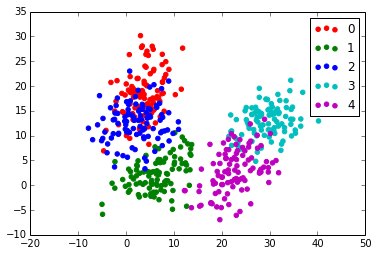

In [2]:
np.random.seed(43) 
n=100
p=2
m=5
X,Y = classification_gaussians(n,p,m,False,False,True)

In [3]:
print 'computing cross validation error for Linear Discriminant Analaysis'
cv_LDA = n_cross_validation(X,Y,lin_quad_discriminant_analysis_train_test,(True,False,0.5),10)
print 'cross validation classification error rate for LDA is  '+str(cv_LDA[0])

computing cross validation error for Linear Discriminant Analaysis
cross validation classification error rate for LDA is  0.16


In [4]:
print 'computing cross validation error for Quadratic Discriminant Analaysis'
cv_QDA = n_cross_validation(X,Y,lin_quad_discriminant_analysis_train_test,(False,False,0.5),10)
print 'cross validation classification error rate for QDA is  '+str(cv_QDA[0])

computing cross validation error for Quadratic Discriminant Analaysis
cross validation classification error rate for QDA is  0.158


In [5]:
alpha_values = np.linspace(0.001,0.999,num=10,endpoint=True) #so that we can put it on the same plot easily
errors_for_alpha = []
#use cross validation to choose alpha
print 'computing cross validation error for RDA'
for a in alpha_values:
   cva = n_cross_validation(X,Y,lin_quad_discriminant_analysis_train_test,(False,True,a),10)
   print 'cross validation classification error rate for RDA alpha='+str(a)+' is  '+str(cva[0])
   errors_for_alpha.append(cva[0])

computing cross validation error for RDA
cross validation classification error rate for RDA alpha=0.001 is  0.15
cross validation classification error rate for RDA alpha=0.111888888889 is  0.154
cross validation classification error rate for RDA alpha=0.222777777778 is  0.164
cross validation classification error rate for RDA alpha=0.333666666667 is  0.162
cross validation classification error rate for RDA alpha=0.444555555556 is  0.16
cross validation classification error rate for RDA alpha=0.555444444444 is  0.156
cross validation classification error rate for RDA alpha=0.666333333333 is  0.156
cross validation classification error rate for RDA alpha=0.777222222222 is  0.156
cross validation classification error rate for RDA alpha=0.888111111111 is  0.158
cross validation classification error rate for RDA alpha=0.999 is  0.156


In [6]:
print 'computing cross validation error for Gaussian Naive Bayes'
cv_gnb = n_cross_validation(X,Y,gaussian_naive_bayes_train_test,(False),10)
print 'cross validation classification error rate for Gaussian Naive Bayes is  '+str(cv_gnb[0])

computing cross validation error for Gaussian Naive Bayes
cross validation classification error rate for Gaussian Naive Bayes is  0.156


In [7]:
log_reg = logistic_regression(X,Y,m)
log_reg.train()
Y_pred = log_reg.predict(X)
log_reg_train_err = classification_error_rate(np.reshape(Y_pred,(Y_pred.size,1)),Y)
print log_reg_train_err

beginning minimization of negative log likelihood for logistic regression
  119  163.919279857819  6.83192509395e-08  Optimization Converged
[ 0.148]


converged in 10 iterations
1284161.30094


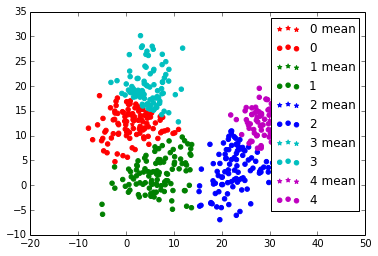

In [8]:
km_obj = kmeans(X,m)
km_obj.train()
print km_obj.value()
y_pred = km_obj.predict(X,True)

converged in 6 iterations
2197104.94378


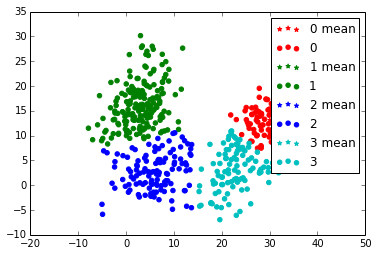

In [11]:
km_obj = kmeans(X,m-1)
km_obj.train()
print km_obj.value()
y_pred = km_obj.predict(X,True)